In [1]:
%matplotlib inline

from scipy.io import arff
import numpy as np

dataset, meta = arff.loadarff('/content/drive/MyDrive/ECG5000/ECG5000_TRAIN.arff')
# dataset, meta = arff.loadarff('/content/drive/MyDrive/ECG5000/ECG5000_TEST.arff')

ds = np.asarray(dataset.tolist(), dtype=np.float32)
x_dataset = ds[:, :140]
y_dataset = np.asarray(ds[:, -1].tolist(), dtype=np.int8)

[1 1 1 1 1 1 1 1 1 1]


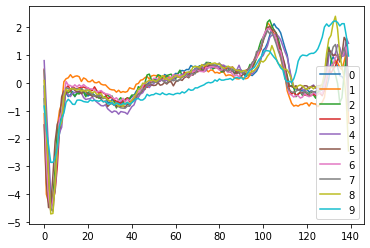

In [2]:
import matplotlib.pyplot as plt

N = 10
print(y_dataset[:N])
obj = plt.plot(x_dataset[:N].T)
plt.legend(obj, [str(n) for n in range(N)])

In [3]:
# 訓練データとテストデータを分割（＋データの整形）

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

x_train, x_test, y_train, y_test = train_test_split(x_dataset[:,:,np.newaxis], to_categorical(y_dataset), test_size=0.2, random_state=4)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, SimpleRNN

hid_dim = 10

# SimpleRNNにDenseを接続し、分類
model = Sequential()

model.add(SimpleRNN(hid_dim, input_shape=x_train.shape[1:], ))
model.add(Dense(y_train.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
model.fit(x_train, y_train, epochs=50, batch_size=100, verbose=2, validation_split=0.2)

Epoch 1/50
4/4 - 4s - loss: 1.9334 - accuracy: 0.4187 - val_loss: 1.9475 - val_accuracy: 0.4125 - 4s/epoch - 998ms/step
Epoch 2/50
4/4 - 0s - loss: 1.8806 - accuracy: 0.4313 - val_loss: 1.8911 - val_accuracy: 0.4125 - 453ms/epoch - 113ms/step
Epoch 3/50
4/4 - 0s - loss: 1.8303 - accuracy: 0.4469 - val_loss: 1.8375 - val_accuracy: 0.4125 - 420ms/epoch - 105ms/step
Epoch 4/50
4/4 - 0s - loss: 1.7831 - accuracy: 0.4781 - val_loss: 1.7869 - val_accuracy: 0.4250 - 406ms/epoch - 102ms/step
Epoch 5/50
4/4 - 1s - loss: 1.7387 - accuracy: 0.5031 - val_loss: 1.7395 - val_accuracy: 0.4500 - 508ms/epoch - 127ms/step
Epoch 6/50
4/4 - 0s - loss: 1.6958 - accuracy: 0.5188 - val_loss: 1.6953 - val_accuracy: 0.4500 - 424ms/epoch - 106ms/step
Epoch 7/50
4/4 - 0s - loss: 1.6555 - accuracy: 0.5344 - val_loss: 1.6528 - val_accuracy: 0.4625 - 426ms/epoch - 107ms/step
Epoch 8/50
4/4 - 0s - loss: 1.6169 - accuracy: 0.5469 - val_loss: 1.6116 - val_accuracy: 0.4625 - 419ms/epoch - 105ms/step
Epoch 9/50
4/4 - 0s

In [21]:
score = model.evaluate(x_test, y_test, verbose=0)
print('test_loss:', score[0])
print('test_acc:', score[1])

test_loss: 0.561202883720398
test_acc: 0.8799999952316284


In [22]:
# from IPython.display import SVG
# from tensorflow.python.keras.utils.vis_utils import model_to_dot

# SVG(model_to_dot(model).create(prog='dot', format='svg'))

ImportError: ignored